In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_box = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')].dropna(subset=['salary_hour_avg']).copy()
df_box.head(3)
df_box['salary_hour_avg'].plot(kind='box',vert=False)

plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')
plt.title('hourly salary per data scientist')

plt.show()

In [12]:
df.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [ ]:
countries = ['United States', 'Canada']
df_filter = df[(df['job_title_short']=='Data Analyst') & (df['job_country'].isin(countries))].dropna(subset=['salary_hour_avg'])


country_US = df_filter[df_filter['job_country']=='United States']['salary_hour_avg']
country_CA = df_filter[df_filter['job_country']=='Canada']['salary_hour_avg']

plt.boxplot([country_US,country_CA],labels=countries)
plt.ylabel('Hourly Salary ($USD)')
plt.ylim(0,150)
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')

plt.show()


In [ ]:
countries = ['United States', 'Canada']
df_filter = df[(df['job_title_short']=='Data Analyst') & (df['job_country'].isin(countries))].dropna(subset=['salary_hour_avg'])

country_data_dict = {country: df_filter[df_filter['job_country'] == country]['salary_hour_avg'].reset_index(drop=True)
                     for country in countries}

pd.DataFrame(country_data_dict).plot(kind='box',labels=countries)
plt.ylabel('Hourly Salary ($USD)')
plt.ylim(0,150)
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')
plt.show()

In [ ]:
countries = ['United States', 'Canada']
df_filter = df[(df['job_title_short']=='Data Analyst') & (df['job_country'].isin(countries))].dropna(subset=['salary_hour_avg'])

country = [df_filter[df_filter['job_country'] == country]['salary_hour_avg'] for country in countries]

plt.boxplot(country,labels=countries)
plt.ylabel('Hourly Salary ($USD)')
plt.ylim(0,150)
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')
plt.show()

In [ ]:
countries = ['United States', 'Canada']
df_filter = [df[df['job_country']==country].copy() for country in countries]
df_combined = pd.concat(df_filter,ignore_index=True)
df_combined['job_country']

job_country
United States    206292
Canada            16029
Name: count, dtype: int64

C:\Users\xfan7\AppData\Local\Temp\ipykernel_6000\2337113996.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(job_list, labels=job_titles)


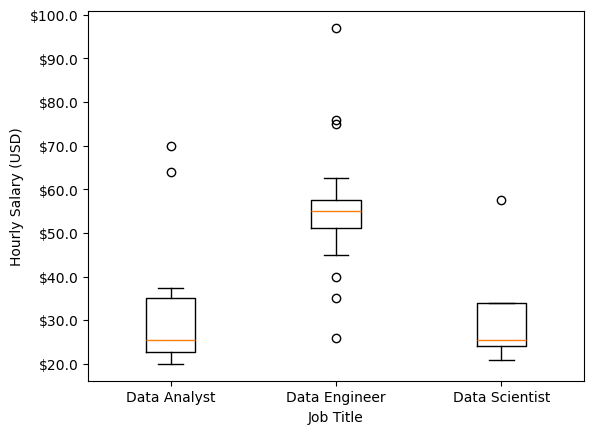

In [ ]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_CAN = df[df['job_country']=='Canada'].dropna(subset=['salary_hour_avg'])
job_list = [df_CAN[df_CAN['job_title_short']==job]['salary_hour_avg'] for job in job_titles]


fig,ax = plt.subplots()
ax.boxplot(job_list, labels=job_titles)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${y}'))
plt.xlabel('Job Title')
plt.ylabel('Hourly Salary (USD)')

plt.show()